In [9]:
%matplotlib notebook 
##enables interaction of the plots (so no plt.figure() and a bunch of commands)
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import odr 
from astropy.io import ascii
from IPython.display import Image

<IPython.core.display.Javascript object>


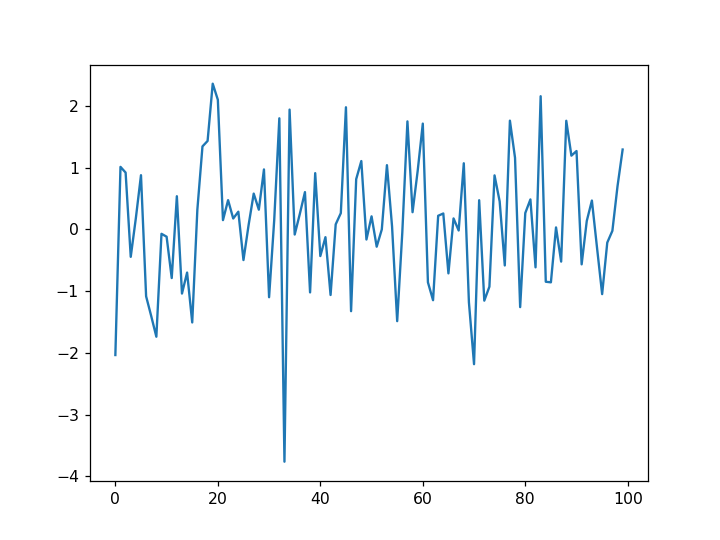

In [11]:
data1 = np.random.randn(100)
plt.plot(data1)
## for more resources: https://matplotlib.org/tutorials/introductory/pyplot.html and  https://software-carpentry.org/lessons/

# Markdown
This is a_markdown_cell.

Markdown cheatsheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

       Time (s)            Channel 1 (V)          Channel 2 (V)    
---------------------- ---------------------- ---------------------
-4.095928571428572e-05 -0.0006044869355946329 -0.004762589700507769
-4.094928571428572e-05 -0.0006044869355946329 -0.003733886068751154
-4.093928571428572e-05  -0.001960038321049286 -0.004419688489922387
-4.092928571428572e-05  -0.003315589706502091 -0.004762589700507613
-4.091928571428572e-05  0.0004121766034958951 -0.004419688489922231
-4.090928571428572e-05 -0.0009433747819581422 -0.003048083647580076
-4.089928571428572e-05   0.001089952296222914 -0.004419688489922231
-4.088928571428572e-05 -0.0002655990892305071 -0.004419688489922231
-4.087928571428572e-05 -0.0006044869355946329 -0.004762589700507769
-4.086928571428572e-05  -0.001282262628321652 -0.002705182436994538
                   ...                    ...                   ...
 4.085071428571428e-05  0.0004121766034958951 -0.003390984858165615
 4.086071428571428e-05  7.328875713238578e-05 -0

<IPython.core.display.Javascript object>


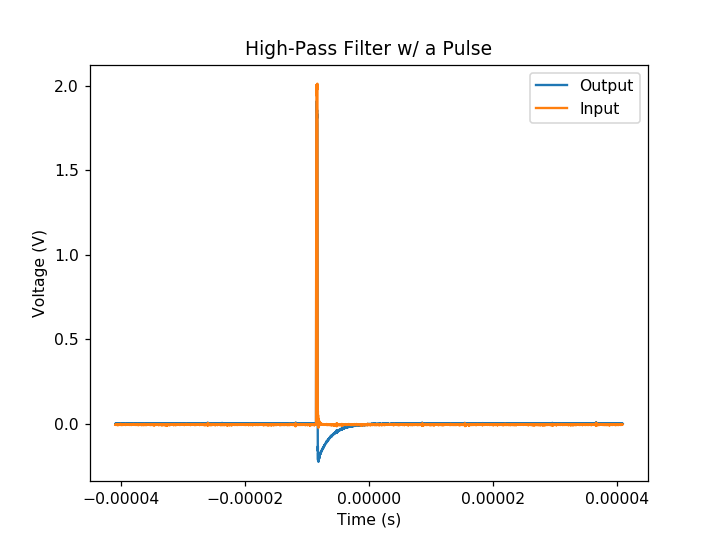

In [12]:
plt.close()
filename = 'new_lab_data.csv'
data = ascii.read(filename)
print(data)
time1 = data['Time (s)']
CH1 = data['Channel 1 (V)']
CH2 = data['Channel 2 (V)']
plt.plot(time1, CH1, label = 'Output')
plt.plot(time1, CH2, label = 'Input')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('High-Pass Filter w/ a Pulse')
plt.legend()

#which does match the data in waveform

time = data.columns[0]  
time = np.array([time])[0]

#this gets rid of the labels

input = data.columns[1]  
input = np.array([input])[0]

#so does this line, gets rid of the labels so np can read the data

output = data.columns[2] 
output = np.array([output])[0]

#note: the data does not line up exactly with 0 time....
plt.show()

<IPython.core.display.Javascript object>


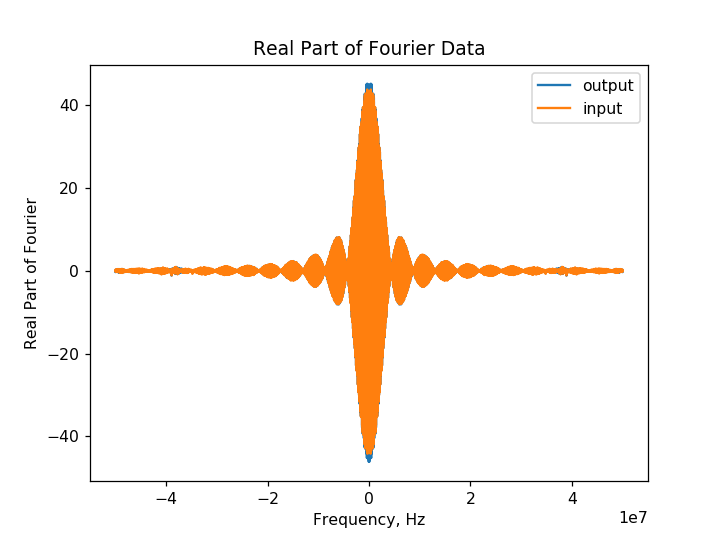

Text(0.5, 1.0, 'Real Part of Fourier Data')

In [14]:
plt.close()

#closes the above interactive plot to move onto the next

tfoutput = np.fft.fft(np.fft.fftshift(output))
tfinput = np.fft.fft(np.fft.fftshift(input))
deltatime=(np.max(time)-np.min(time))/(len(time)-1)
plt.plot(np.fft.fftfreq(len(time),deltatime),np.real(tfoutput),label='output')
plt.plot(np.fft.fftfreq(len(time),deltatime),np.real(tfinput),label='input')
plt.legend()
plt.xlabel('Frequency, Hz')
plt.ylabel('Real Part of Fourier')
plt.title('Real Part of Fourier Data')

<IPython.core.display.Javascript object>


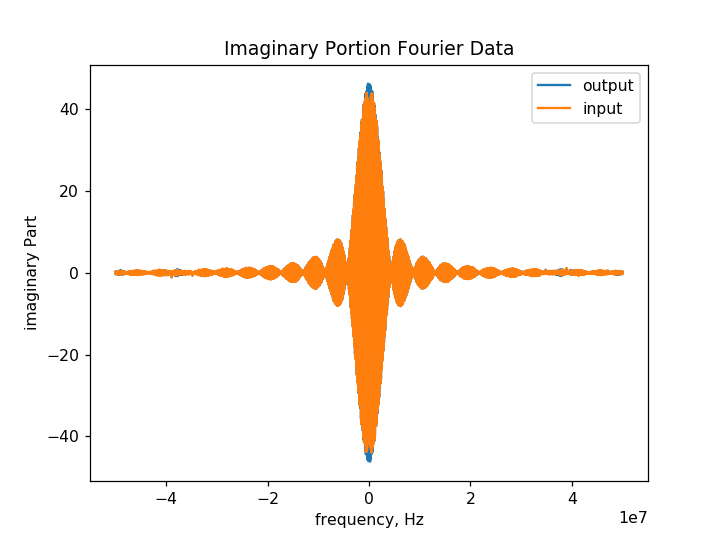

Text(0.5, 1.0, 'Imaginary Portion Fourier Data')

In [22]:
plt.close()
tfoutput2=np.fft.fft(np.fft.fftshift(output))
tfinput2=np.fft.fft(np.fft.fftshift(input))
dt=(np.max(time)-np.min(time))/(len(time)-1)
plt.plot(np.fft.fftfreq(len(time),dt),np.imag(tfoutput2),label='output')
plt.plot(np.fft.fftfreq(len(time),dt),np.imag(tfinput2),label='input')
plt.legend()
plt.xlabel('frequency, Hz')
plt.ylabel('imaginary Part')
plt.title('Imaginary Portion Fourier Data')

#Note: ok, something is weird.......

<IPython.core.display.Javascript object>


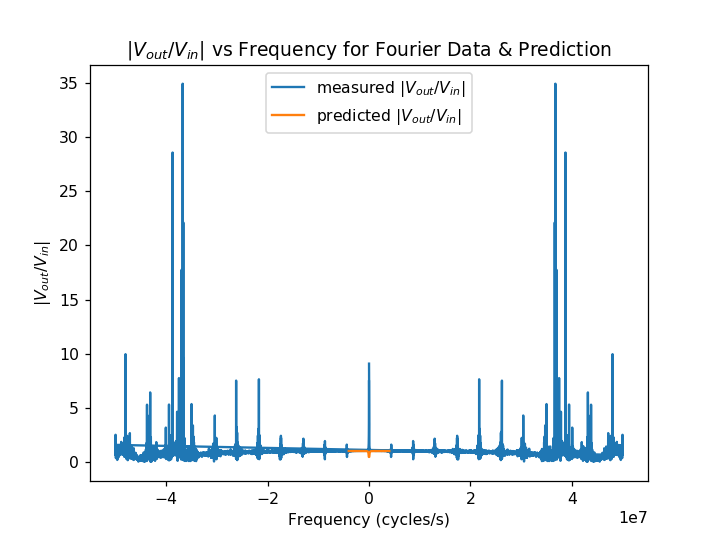

Text(0.5, 1.0, '$|V_{out}/V_{in}|$ vs Frequency for Fourier Data & Prediction')

In [23]:
plt.close()
plt.plot(np.fft.fftfreq(len(time),dt),np.abs(tfoutput)/np.abs(tfinput),label='measured $|V_{out}/V_{in}|$')

R=200
C=10**(-8)
frarray = np.linspace(-4*10**6, 4*10**6, 100)
plt.plot(freqarray,np.sqrt(R**2/(R**2+1/(2*np.pi*frarray)**2/C**2)),label='predicted $|V_{out}/V_{in}|$')
plt.legend()
plt.xlabel('Frequency (cycles/s)')
plt.ylabel('$|V_{out}/V_{in}|$')
plt.title('$|V_{out}/V_{in}|$ vs Frequency for Fourier Data & Prediction')

<IPython.core.display.Javascript object>


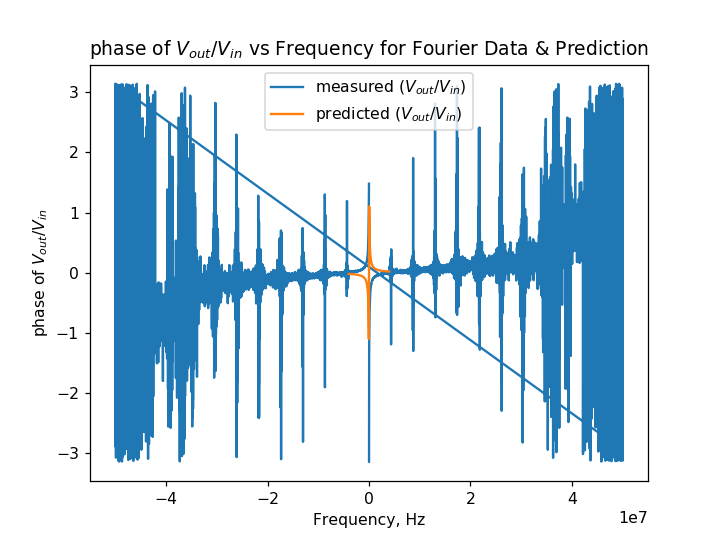

Text(0.5, 1.0, 'phase of $V_{out}/V_{in}$ vs Frequency for Fourier Data & Prediction')

In [25]:
plt.close()

plt.plot(np.fft.fftfreq(len(time),dt),np.angle(tfoutput/tfinput),label='measured $(V_{out}/V_{in})$')

R=200
C=10**(-8)
frarray = np.linspace(-4*10**6, 4*10**6, 100)
plt.plot(freqarray,np.angle(R/(R+1/(1j*2*np.pi*frarray*C))),label='predicted $(V_{out}/V_{in})$')
plt.legend()
plt.xlabel('Frequency, Hz')
plt.ylabel('phase of $V_{out}/V_{in}$')
plt.title('phase of $V_{out}/V_{in}$ vs Frequency for Fourier Data & Prediction')

In [ ]:
#Note: no idea why imaginary and real parts of the fourier transform are the exact same.....